In [37]:
# get the loss from the log file
import re
def parse_delete_loss(filepath):

    with open(filepath, 'r') as file:
        train_loss = {}
        val_loss = {}
        train_loss['fron'] = []
        train_loss['pos'] = []
        train_loss['cls'] = []
        train_loss['edge'] = []
        train_loss['surf'] = []
        train_loss['steric'] = []
        val_loss['fron'] = []
        val_loss['pos'] = []
        val_loss['cls'] = []
        val_loss['edge'] = []
        val_loss['surf'] = []
        val_loss['steric'] = []
        for line in file:
            # Split the line by '|', which separates different data points
            parts = line.strip().split('|')
            if not parts:
                continue
            module = parts[0].split(' ')[-4]


            if module == 'Training' or module == 'Evaluate':
                epoch = parts[0].split(' ')[-2]

                match = re.search(r"Loss\(Fron\) (\d+\.\d+)", line)
                fron_loss = float(match.group(1))

                match = re.search(r"Loss\(Pos\) (-?\d+\.\d+)", line)
                pos_loss = float(match.group(1))

                match = re.search(r"Loss\(Cls\) (\d+\.\d+)", line)
                cls_loss = float(match.group(1))

                match = re.search(r"Loss\(Edge\) (\d+\.\d+)", line)
                edge_loss = float(match.group(1))

                match = re.search(r"Loss\(Surf\) (\d+\.\d+)", line)
                surf_loss = float(match.group(1))

                match = re.search(r"Loss\(Steric\) (\d+\.\d+)", line)
                if match:
                    steric_loss = float(match.group(1))
                else:
                    steric_loss = 0

                if module == 'Training':
                    train_loss['fron'].append(fron_loss)
                    train_loss['pos'].append(pos_loss)
                    train_loss['cls'].append(cls_loss)
                    train_loss['edge'].append(edge_loss)
                    train_loss['surf'].append(surf_loss)
                    train_loss['steric'].append(steric_loss)
                else:
                    val_loss['fron'].append(fron_loss)
                    val_loss['pos'].append(pos_loss)
                    val_loss['cls'].append(cls_loss)
                    val_loss['edge'].append(edge_loss)
                    val_loss['surf'].append(surf_loss)
                    val_loss['steric'].append(steric_loss)
    return train_loss, val_loss


In [40]:
loss_path = './log.txt'
train_loss, val_loss = parse_delete_loss(loss_path)

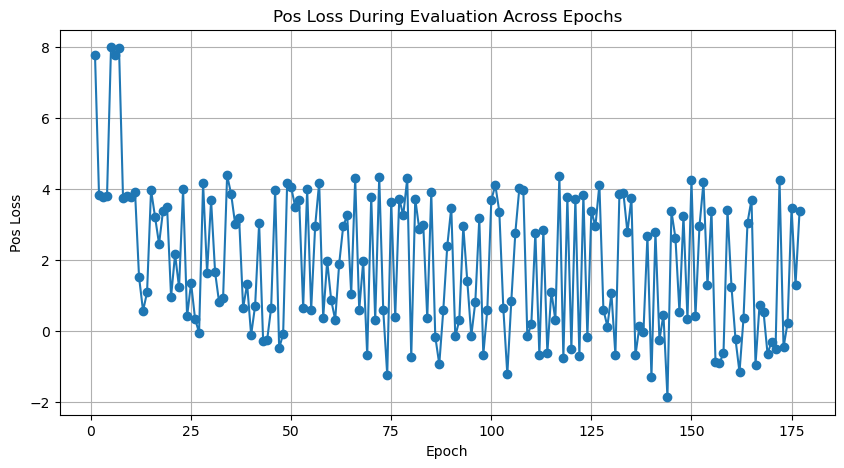

In [38]:
# Plot the pos loss
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss['pos']) + 1)
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss['pos'], marker='o')
plt.title('Pos Loss During Evaluation Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Pos Loss')
plt.grid(True)
plt.show()

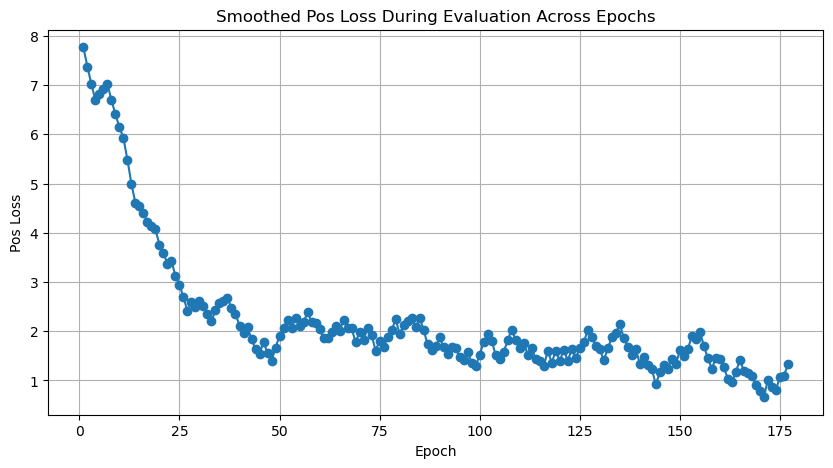

In [39]:
import numpy as np

def smooth_curve(points, factor=0.9):
    """Smoothing using simple moving averages"""
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smoothed_pos_loss = smooth_curve(train_loss['pos'], factor=0.9)
plt.figure(figsize=(10, 5))
plt.plot(epochs, smoothed_pos_loss, marker='o')
plt.title('Smoothed Pos Loss During Evaluation Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Pos Loss')
plt.grid(True)
plt.show()
